## Exploratory Data Analysis of Instacart Dataset

This notebook is for exploratory data analysis and visualizes various trends seen in the data.The dataset is a relational set of files describing customers' orders over time.

In [1]:
#Import modules


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline 

In [2]:
#Import the files

aisles_df = pd.read_csv('aisles.csv')
products_df = pd.read_csv('products.csv')
orders_df = pd.read_csv('orders.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
departments_df = pd.read_csv('departments.csv')
order_products_train_df = pd.read_csv('order_products__train_cap.csv')

### Which products are most popular?

In [6]:
#creating a dataframe containing detail description of product names and id present in every order


order_products_prior_details = pd.merge(order_products_prior_df, products_df, on='product_id', how='left') 


In [7]:
order_products_prior_details.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4


In [8]:
#creating dataframe for top 10 most popular product

Popular_product = order_products_prior_details['product_name'].value_counts().reset_index().head(10)
Popular_product.columns = ['product_name', 'frequency_count']
Popular_product

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


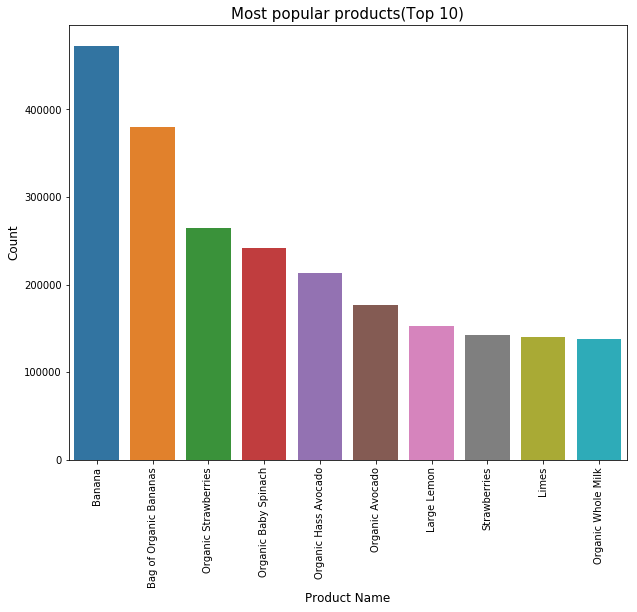

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(x='product_name', y="frequency_count", data=Popular_product)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Most popular products(Top 10)", fontsize=15)
plt.show()

### Which Day of the Week do Customers buy most of their groceries?
Sunday and Monday shows higher number of orders than other days

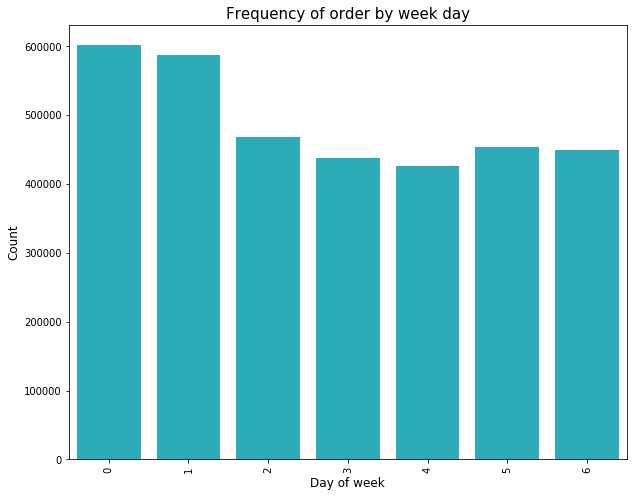

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x="order_dow", data=orders_df, color=color[9])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

### How frequently do customers order?
Weekly and Monthly

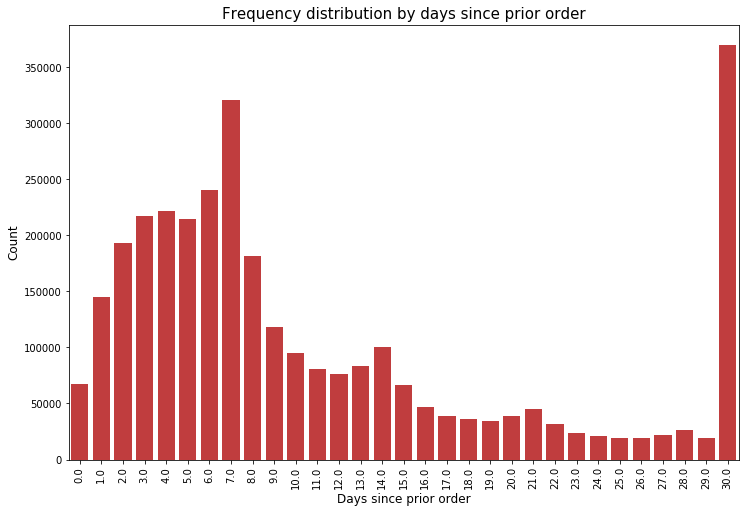

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

### Distribution of orders recieved during the day

Majority of the order is made during 9am - 5 pm


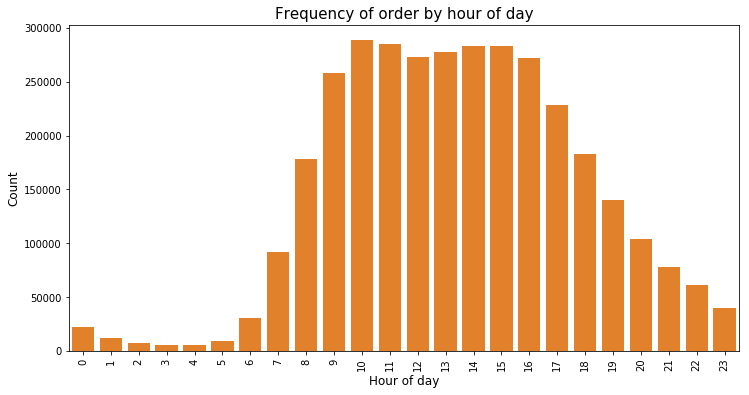

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

### How Orders recieved during day varies over week

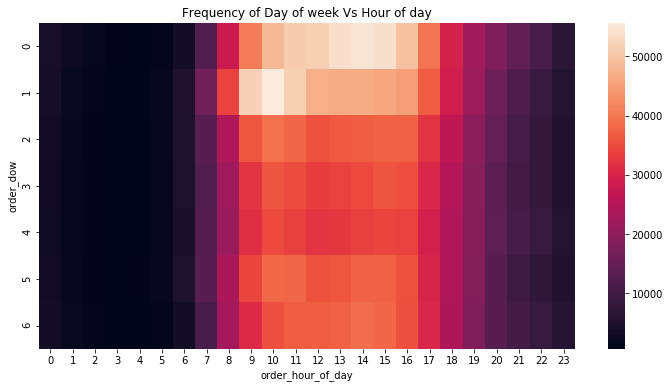

In [16]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

### How many orders per user?

Majority of the users have 4 orders. However all the users have their orders between 4- 100

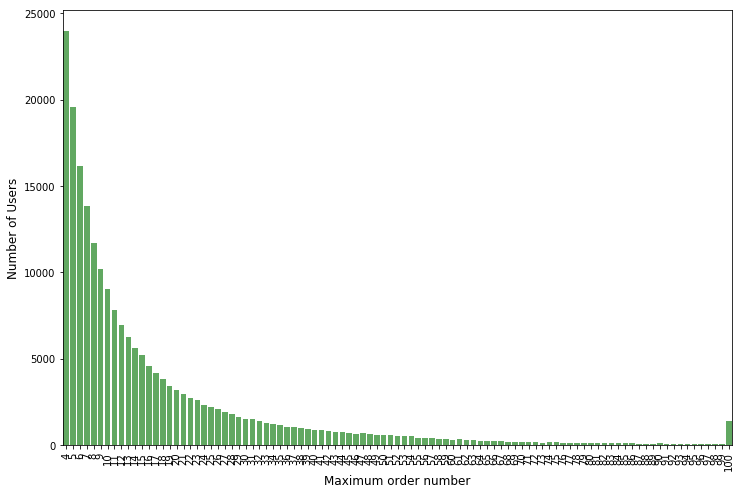

In [20]:
num_of_orders_user = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
num_of_orders_user = num_of_orders_user.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(num_of_orders_user.index, num_of_orders_user.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Users', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Popular Department Daywise

Department 4 (Produce) is the most popular department,followed by dairy eggs and snacks. This is the same trend throughout the week.

In [22]:
order_products_prior_details2=order_products_prior_details2=order_products_prior_details.merge(orders_df, on='order_id')

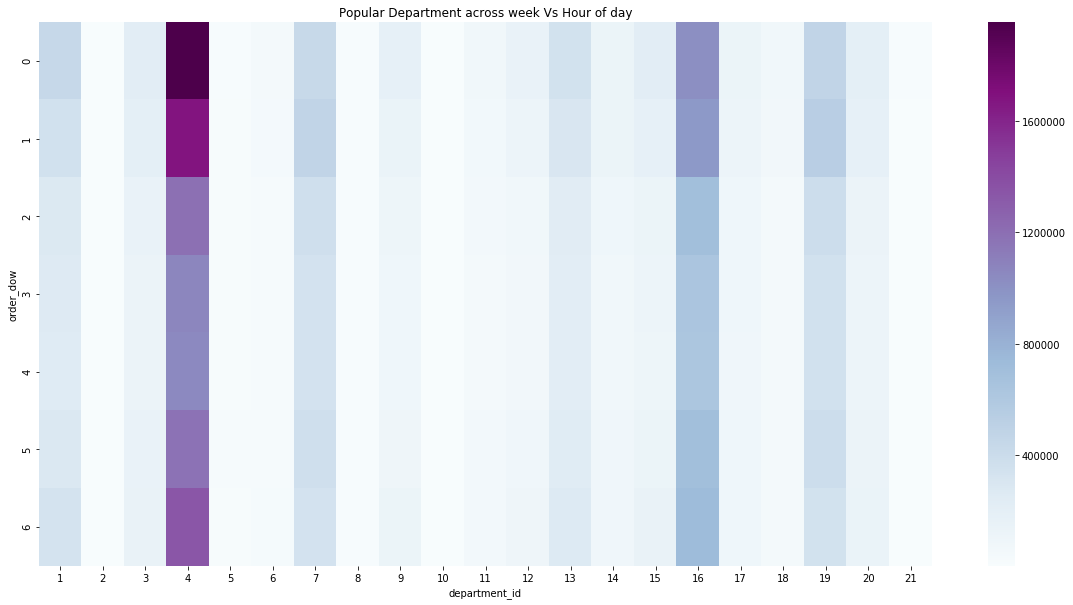

In [65]:
grouped_df_2 = order_products_prior_details2.groupby(["order_dow", "department_id"])["order_number"].aggregate("count").reset_index()
grouped_df_2 = grouped_df_2.pivot('order_dow', 'department_id', 'order_number')

plt.figure(figsize=(20,10))
sns.heatmap(grouped_df_2,cmap="BuPu")

plt.title("Popular Department across week Vs Hour of day")
plt.show()


In [25]:
departments_df 

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### Departmentwise reorder Ratio

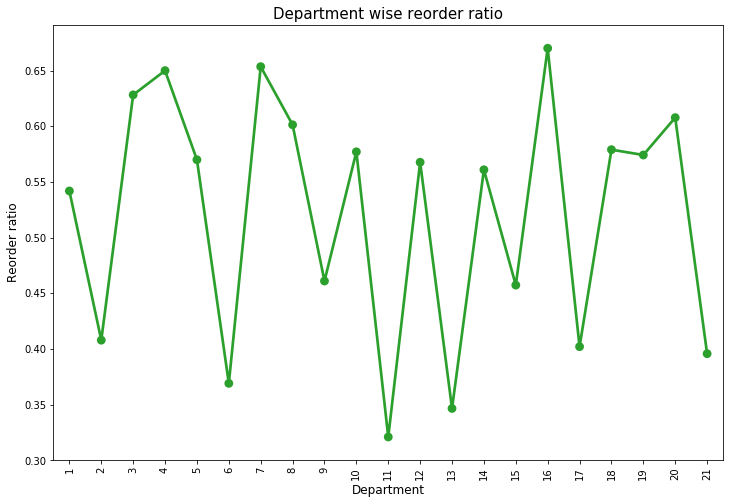

In [10]:
dep_reorder_df = order_products_prior_details.groupby(["department_id"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(dep_reorder_df['department_id'].values, dep_reorder_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### Number of Products per order
Majority of orders have 5-6 products in them

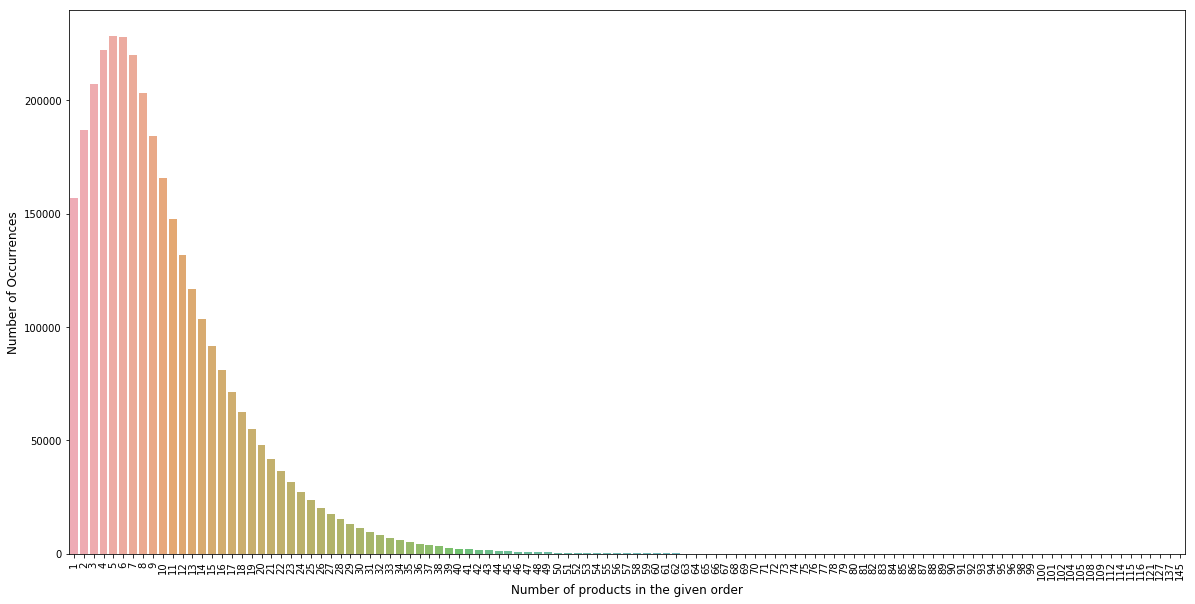

In [48]:
grouped_df3 = order_products_prior_details2.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
prod_per_order = grouped_df3.add_to_cart_order.value_counts()

plt.figure(figsize=(20,10))
sns.barplot(prod_per_order.index, prod_per_order.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

After completing the exploratory data analysis,notebook "2.Instacart-feature_engineering and flat file creation.ipynb" will show how these relational files are merged and feature engineering is done on the training data